# ***Linked lists***

Linked lists are like arrays - they're an ordered collection of elements. The main difference is how they are implemented.


Let's start by introducing the concept of a node. A node can be thought of as an element, but with more information than just one piece of data like an integer or string. Nodes are an abstract idea - for example, let's say you had an array [1, 2, 3]. You could imagine each element as a node with two pieces of information: the integer, and the index. So the second element would be something like

    data: 2
    index: 1

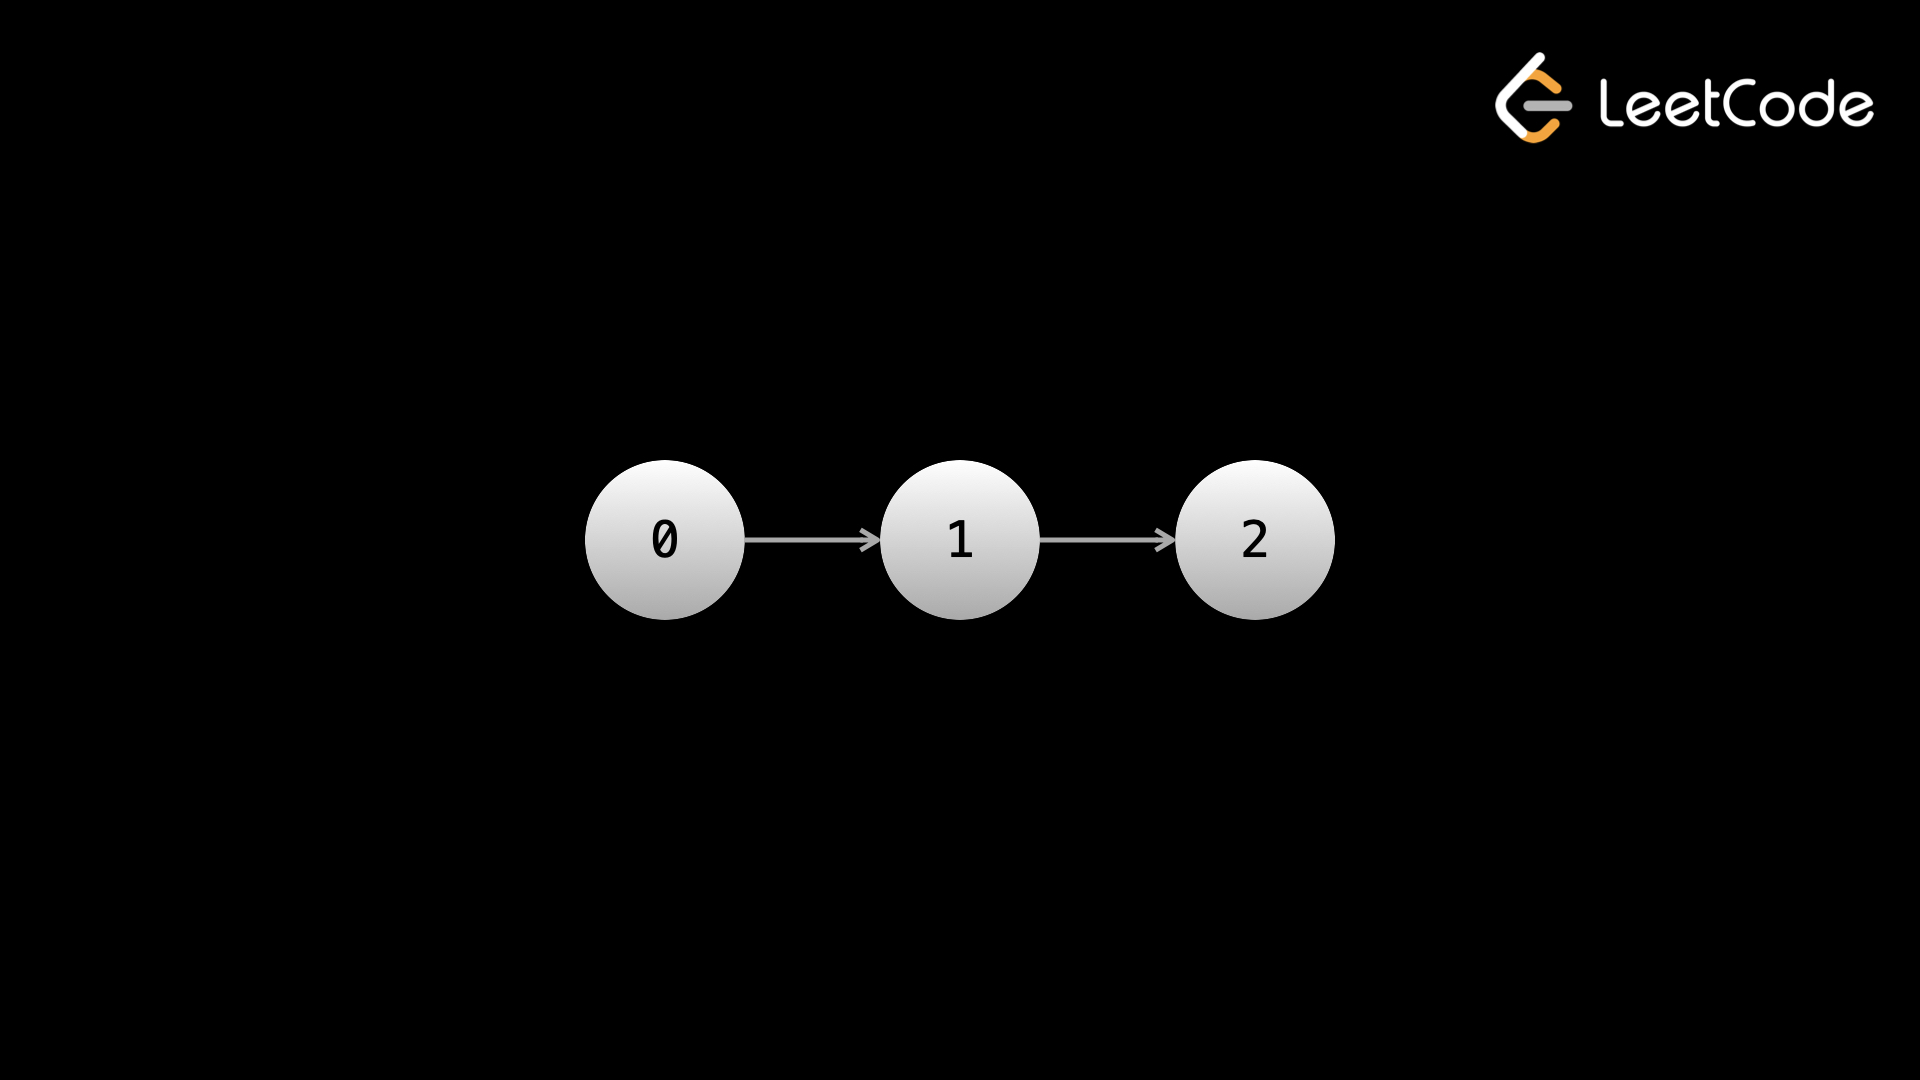

Here's some example code for creating a linked list to represent the data 1 --> 2 --> 3. As you can see, the class that defines a node has a field val which will hold the data, and a next pointer which references the next node. In the code, we are creating three nodes, one for each number, then setting the next pointers accordingly. You can try playing around with the code yourself in the interactive playground (you can edit the code and run it to see the console output).

In [2]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
    
one = ListNode(1)
two = ListNode(2)
three = ListNode(3)
one.next = two
two.next = three
head = one

print(head.val)
print(head.next.val)
print(head.next.next.val)

1
2
3


We call the node with the 1 the head because it is the start of the linked list. Usually, you will want to keep a reference to the head. This is because the head is the only node from where you can reach all elements in the linked list (you might have noticed that we can't go backward), so by keeping a reference to it, you ensure that you never "lose" any elements.

# Advantages and disadvantages compared to arrays

To be honest, the advantages and disadvantages are not super relevant in terms of algorithm problems. This is because almost all the problems that involve linked lists will have the linked list as part of the input, so there isn't a decision on if you should use it, you're forced to. However, there are a few problems that use a linked list as part of the optimal algorithm, and you may be asked trivia in an interview, so it's still good to know the advantages and disadvantages.

he main advantage of a linked list is that you can add and remove elements at any position in O(1). The caveat is that you need to have a reference to a node at the position in which you want to perform the addition/removal, otherwise the operation is O(n), because you will need to iterate starting from the head until you get to the desired position. However, this is still much better than a normal (dynamic) array, which requires O(n) for adding and removing from an arbitrary position.

The main disadvantage of a linked list is that there is no random access. If you have a large linked list and want to access the 150,000th element, then there usually isn't a better way than to start at the head and iterate 150,000 times. So while an array has O(1) indexing, a linked list could require O(n) to access an element at a given position.

A few other notes that are less relevant for algorithm problems but may come up in an interview discussion - linked lists have the advantage of not having fixed sizes. 

# Mechanics of a linked list

Understanding how to manipulate linked list nodes and pointers using code is essential not only to solve linked list interview questions, but the underlying concept of handling pointers is fundamental for any software engineer.

**Assignment (=)**

When you assign a pointer to an existing linked list node, the pointer refers to the object in memory. Let's say you have a node head:

In [ ]:
ptr = head
head = head.next
head = None

After these lines of code, ptr still refers to the original head node, even though the head variable changed. This is the first important concept: variables remain at nodes unless they are modified directly (ptr = something is the only way to modify ptr).

**Chaining .next**

If you have multiple .next, for example head.next.next, everything before the final .next refers to one node. For example, given a linked list 1 -> 2 -> 3, if you have head pointing at the first node, and you do head.next.next, you are actually referring to 2.next, because head.next is the 2. We'll soon see that this is a very useful technique.

**Traversal**

Iterating forward through a linked list can be done with a simple loop. This is the usual code that you will use to do so: as an example let's get the sum of all values from an integer linked list:

In [ ]:
def get_sum(head):
    ans = 0
    while head:
        ans += head.val
        head = head.next
    
    return ans

The final node's next pointer is null. Therefore, after doing head = head.next at the final node, head becomes null and the while loop ends.

Moving to head.next is the equivalent of iterating to the next element in an array. Traversal can also be done recursively:

In [ ]:
def get_sum(head):
    if not head:
        return 0
    
    return head.val + get_sum(head.next)

***Types of linked lists***

**Singly linked list**

In a singly linked list, each node only has a pointer to the next node. This means you can only move forward in the list when iterating. The pointer used to reference the next node is usually called next.

Let's say you want to add an element to a linked list so that it becomes the element at position i. To do this, you need to have a pointer to the element currently at position i - 1. The next element (currently at position i), call it x, will be pushed to the element at position i + 1 after the insertion. This means that x should become the next node to the one being added, and the node being added should become the next node to the one currently at i - 1. Here's some code and images demonstrating:

In [ ]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def add_node(prev_node, node_to_add):
    node_to_add.next = prev_node.next #This line sets the next pointer of the node_to_add to point to 
                                      #the node that comes after prev_node in the list.
    prev_node.next = node_to_add    #This line then adjusts the next pointer of prev_node to point to node_to_add.

<video src="20240128-1800-11.0459757.mp4" controls title="Title"></video>

If you don't have a pointer to the desired position at all, you will need to iterate from the head until you are at the desired position, which means the operation would be O(n). If you have the pointer already, it's 
O(1).

Let's say you want to delete the element at position i. Again, you need to have a pointer to the element currently at position i - 1. The element at position i + 1, call it x, will be shifted over to be at position i after the deletion. Therefore, you should set x as the next node to the element currently at position i - 1. Here's some code and images demonstrating

In [ ]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def delete_node(prev_node):
    prev_node.next = prev_node.next.next

prevNode.next is the node being deleted. prevNode.next.next is the node after that which should be kept. We change the next pointer of prevNode to point at that node instead of the one being deleted.

Because the node being deleted could only have been reached from prevNode and we have now severed that connection, it is no longer part of the list.

As mentioned before, when you have a reference to the node at i - 1, then insertion and deletion is O(1). However, without that reference, you need to obtain the reference by iterating from the head, which for an arbitrary position is O(n).

**Doubly linked list**

A doubly linked list is like a singly linked list, but each node also contains a pointer to the previous node. This pointer is usually called prev, and it allows iteration in both directions.

In a singly linked list, we needed a reference to the node at i - 1 if we wanted to add or remove at i. This is because we needed to perform operations on the prevNode. With a doubly linked list, we only need a reference to the node at i. This is because we can simply reference the prev pointer of that node to get the node at i - 1, and then do the exact same operations as above.

With a doubly linked list, we need to do extra work to also update the prev pointers.

<video src="20240128-1754-06.9701225.mp4" controls title="Title"></video>

**Linked lists with sentinel nodes**

We call the start of a linked list the head and the end of a linked list the tail.

Sentinel nodes sit at the start and end of linked lists and are used to make operations and the code needed to execute those operations cleaner. The idea is that, even when there are no nodes in a linked list, you still keep pointers to a head and tail. The real head of the linked list is head.next and the real tail is tail.prev. The sentinel nodes themselves are not part of our linked list.

The previous code we looked at is prone to errors. For example, if we are trying to delete the last node in the list, then nextNode will be null, and trying to access nextNode.next would result in an error. With sentinel nodes, we don't need to worry about this scenario because the last node's next points to the sentinel tail.

The sentinel nodes also allow us to easily add and remove from the front or back of the linked list. Recall that addition and removal is only O(1) if we have a reference to the node at the position we are performing the operation on. With the sentinel tail node, we can perform operations at the end of the list in O(1).

In [38]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

def add_to_end(node_to_add):
    node_to_add.next = tail
    node_to_add.prev = tail.prev
    tail.prev.next = node_to_add
    tail.prev = node_to_add

def remove_from_end():
    if head.next == tail:
        return

    node_to_remove = tail.prev
    node_to_remove.prev.next = tail
    tail.prev = node_to_remove.prev

def add_to_start(node_to_add):
    node_to_add.prev = head
    node_to_add.next = head.next
    head.next.prev = node_to_add
    head.next = node_to_add

def remove_from_start():
    if head.next == tail:
        return
    
    node_to_remove = head.next
    node_to_remove.next.prev = head
    head.next = node_to_remove.next

head = ListNode(None)
tail = ListNode(None)
head.next = tail
tail.prev = head

<video src="20240128-1805-20.5757926.mp4" controls title="Title"></video>

**Dummy pointers**

As mentioned earlier, we usually want to keep a reference to the head to ensure we can always access any element. Sometimes, it's better to traverse using a "dummy" pointer and to keep head at the head

In [ ]:
def get_sum(head):
    ans = 0
    dummy = head
    while dummy:
        ans += dummy.val
        dummy = dummy.next
    
    # same as before, but we still have a pointer at the head
    return ans

Using the dummy pointer allows us to traverse the linked list without losing a reference to the head.

As an exercise, use the interactive playground to implement a doubly linked list 1 <-> 2 <-> 3.

In [15]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None
    
# Write your code here
# Try creating 1 <-> 2 <-> 3
one = ListNode(1)
two = ListNode(2)
three = ListNode(3)

tail = None
one.next = two
two.next = three
three.next = tail

two.prev = one
three.prev = two

head = one

# Test with print()
# Print forward: 1 -> 2 -> 3
current = head
while current:
    print(current.val, end=" -> " if current.next else "\n")
    current = current.next

current = three
while current:
    print(current.val, end=" -> " if current.prev else "\n")
    current = current.prev


1 -> 2 -> 3
3 -> 2 -> 1


# ***Fast and slow pointers***

Fast and slow pointers is an implementation of the two pointers technique that we learned in the arrays and strings chapter. The idea is to have two pointers that don't move side by side. This could mean they move at different "speeds" during iteration, begin iteration from different locations, or any other abstract difference.

When the pointers move at different speeds, usually the "fast" pointer moves two nodes per iteration, whereas the "slow" pointer moves one node per iteration (although this is not always the case). Here's some pseudocode:

    // head is the head node of a linked list
    function fn(head):
        slow = head
        fast = head

        while fast and fast.next:
            Do something here
            slow = slow.next
            fast = fast.next.next

The reason we need the while condition to also check for fast.next is because if fast is at the final node, then fast.next is null, and trying to access fast.next.next would result in an error (you would be doing null.next).

Example 1: Given the head of a linked list with an odd number of nodes head, return the value of the node in the middle.

For example, given a linked list that represents 1 -> 2 -> 3 -> 4 -> 5, return 3.

As mentioned in the previous article, the easiest way to solve this problem would be to just convert the linked list into an array by iterating over it, and then just returning the number in the middle.

    function fn(head):
        array = int[]
        while head:
            array.push(head.val)
            head = head.next

        return array[array.length // 2]

This is basically "cheating", and would never pass as an acceptable solution in an interview. You may have realized that the difficulty in this problem comes from the fact that we don't know how long the linked list is. One thing we could do is iterate through the linked list once with a dummy pointer to find the length, then iterate from the head again once we know the length to find the middle.

In [16]:
def get_middle(head):
    length = 0
    dummy = head
    while dummy:
        length += 1
        dummy = dummy.next
    
    for _ in range(length // 2):
        head = head.next
    
    return head.val

The most elegant solution comes from using the fast and slow pointer technique. If we have one pointer moving twice as fast as the other, then by the time it reaches the end, the slow pointer will be halfway through since it is moving at half the speed.

In [17]:
def get_middle(head):
    slow = head
    fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    return slow.val

<video src="20240128-1834-36.8882318.mp4" controls title="Title"></video>

The pointers use O(1) space, and if there are n nodes in the linked list, the time complexity is O(n) for the traversals.

Example 2: 141. Linked List Cycle

Given the head of a linked list, determine if the linked list has a cycle.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer.

We can apply this logic - move a fast pointer twice the speed of a slow pointer. If they ever meet (except at the start), then we know there must be a cycle. If the fast pointer reaches the end of the linked list, then there isn't a cycle.

<video src="20240128-1853-43.7882757.mp4" controls title="Title"></video>

In [39]:
def hasCycle(head):
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
    return False

In [40]:
head_values = [3, 2, 0, -4]
hasCycle(head_values)

AttributeError: 'list' object has no attribute 'next'

Example 3: Given the head of a linked list and an integer k, return the Kth node from the end.

For example, given the linked list that represents 1 -> 2 -> 3 -> 4 -> 5 and k = 2, return the node with value 4, as it is the 2nd node from the end.

In [ ]:
def find_node(head, k):
    slow = head
    fast = head
    for _ in range(k):
        fast = fast.next

    while fast:
        slow = slow.next
        fast = fast.next.next
    return slow